# Player Segmentation

## 1. Data Exploration

In [1]:
# import library required
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
players = pd.read_csv("players_22.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14184\2061566770.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
# select the features
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
# drop any rows where one of these column has a null or missing value
players = players.dropna(subset=features)

In [6]:
# copy data selected by feature to a new data frame
data = players[features].copy()

In [7]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


In [8]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,1.916500e+04,19165.000000
mean,65.760188,71.079990,9021.721889,2.850452e+06,25.190034
std,6.882803,6.087721,19476.005074,7.613700e+06,4.727515
min,47.000000,49.000000,500.000000,9.000000e+03,16.000000
25%,61.000000,67.000000,1000.000000,4.750000e+05,21.000000
50%,66.000000,71.000000,3000.000000,9.750000e+05,25.000000
75%,70.000000,75.000000,8000.000000,2.000000e+06,29.000000
max,93.000000,95.000000,350000.000000,1.940000e+08,43.000000


## 2. Exploratory Analysis

### Histograms
Analyzing the distribution of overall, potential and age of the dataset

In [9]:
# Stadistical information of numeric columns 
num_cols = data[["overall", "potential", "age"]]
num_cols.describe().round()

,overall,potential,age
count,19165.0,19165.0,19165.0
mean,66.0,71.0,25.0
std,7.0,6.0,5.0
min,47.0,49.0,16.0
25%,61.0,67.0,21.0
50%,66.0,71.0,25.0
75%,70.0,75.0,29.0
max,93.0,95.0,43.0


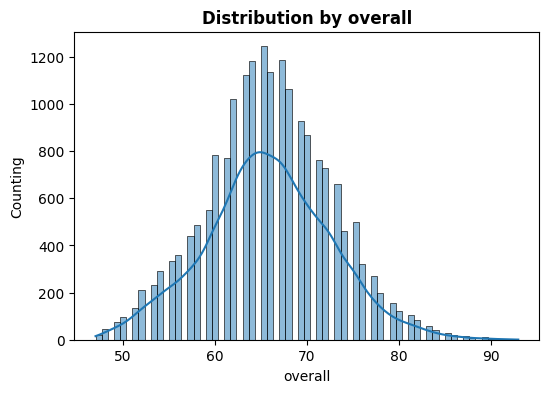

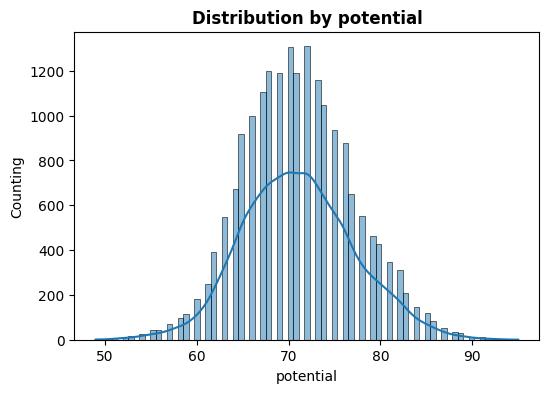

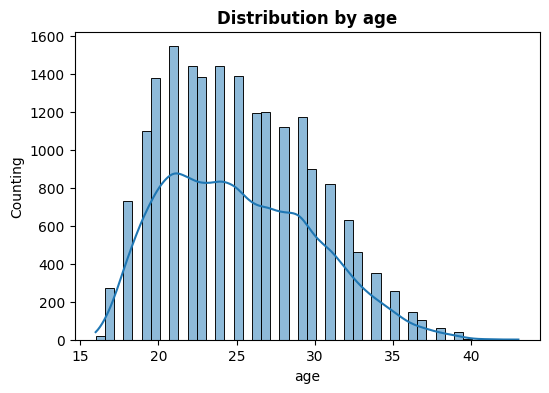

In [10]:
# Analyzing the numeric columns
for num_col in num_cols:
    plt.subplots(figsize=(6, 4))
    sns.histplot(data, x=num_col, kde=True)
    plt.title('Distribution by ' + num_col, loc='center', fontweight='bold')
    plt.ylabel('Counting')
    plt.show()

- The dataset is primarily comprised of individuals aged between 19 and 3 years .
- When it comes to overall, the majority falls within the range of 62 to 70 points .
- When it comes to potential, the majority falls within the range of 65 to 75 points .

### 3. Player Clustering

In [11]:
# scale the data by min max scaling from 1 to 10, because some columns dominate the others
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [12]:
# # # selecting features output array
x = data.iloc[:,[0,1,2,3,4]].values

In [13]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [14]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [15]:
# Elbow Method

score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(data)
    score.append(kmeans.inertia_)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

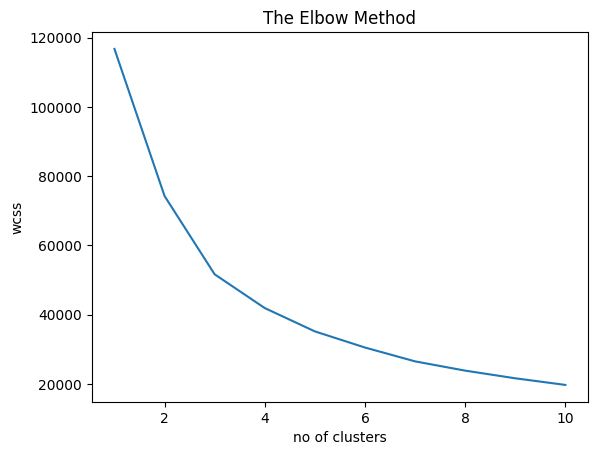

In [16]:
# plotting the score, for 1 to 10 clusters

plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

The above graph selects an elbow point at K=3, but K=4 also looks like a plausible elbow point. So, it’s not clear what should be the elbow point.

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.34597959918656024


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.36106635431224593


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.33062979522936403


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.31923065547327345


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.30886085220879334


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.3120128247110828


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.30415898560824006


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.30280087504972714


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.3016628695068303


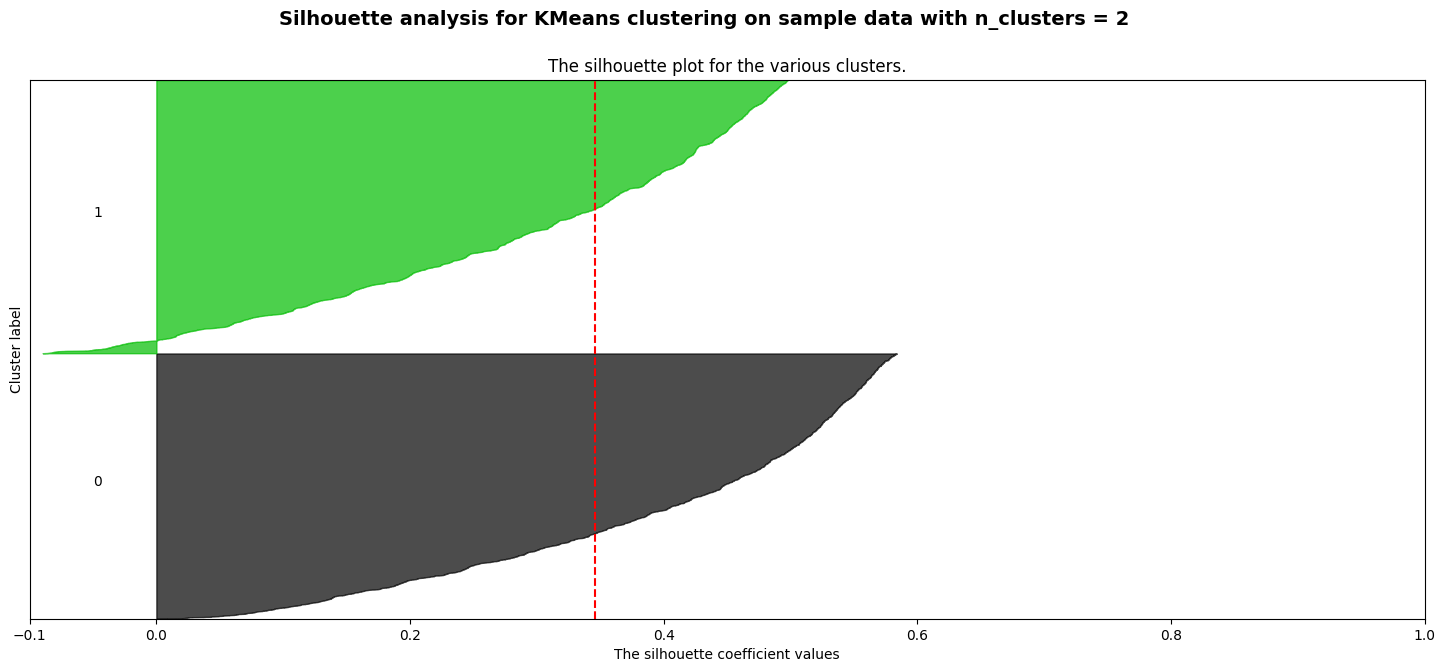

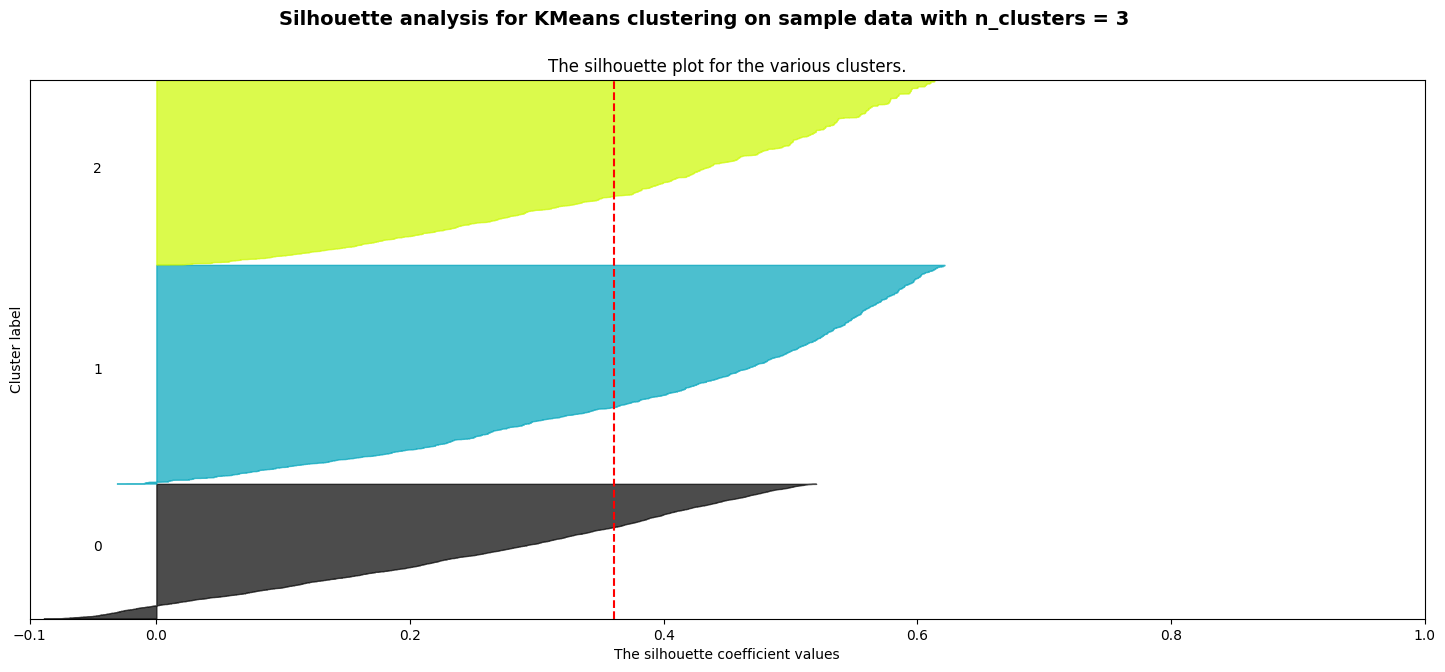

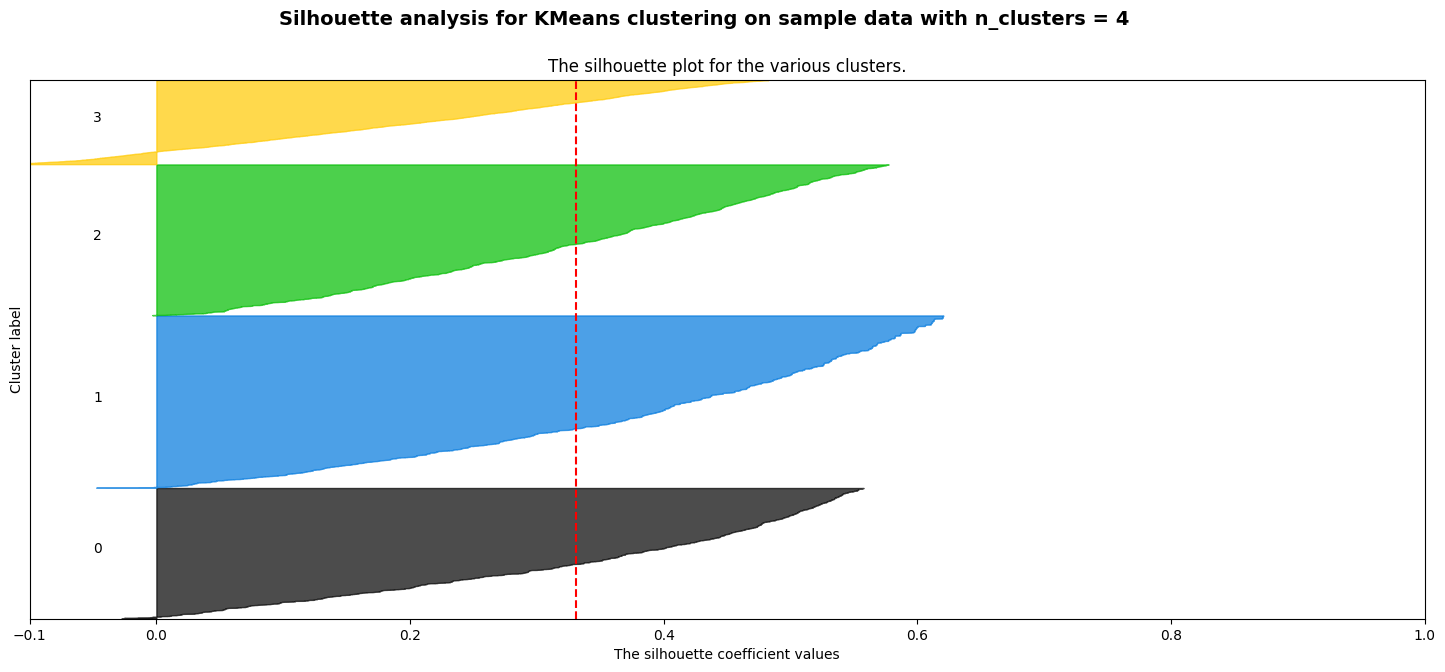

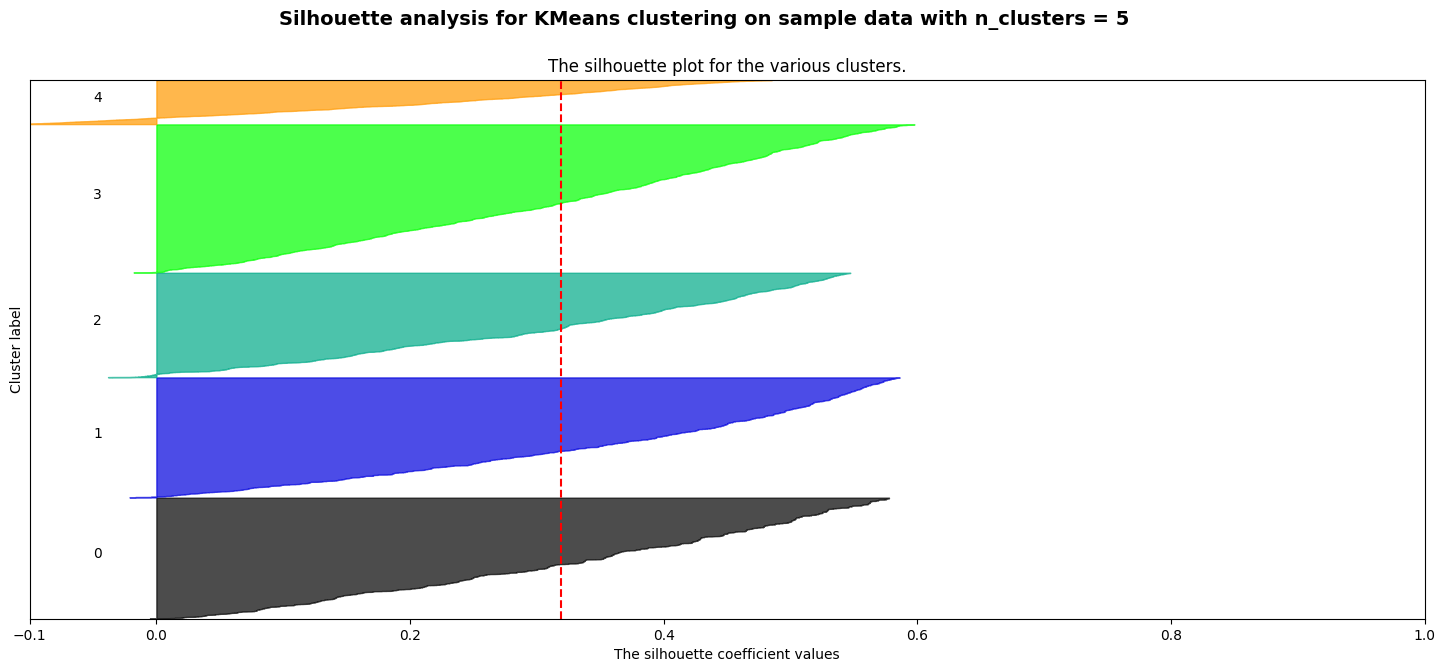

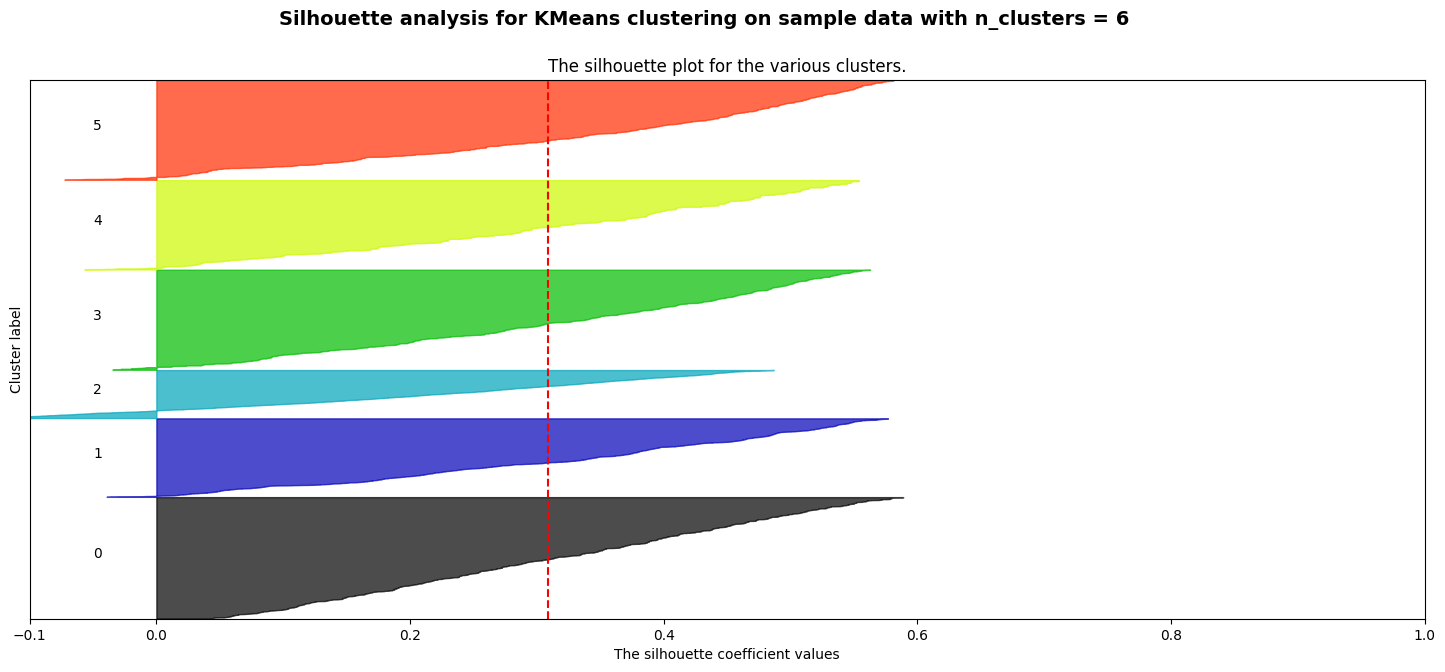

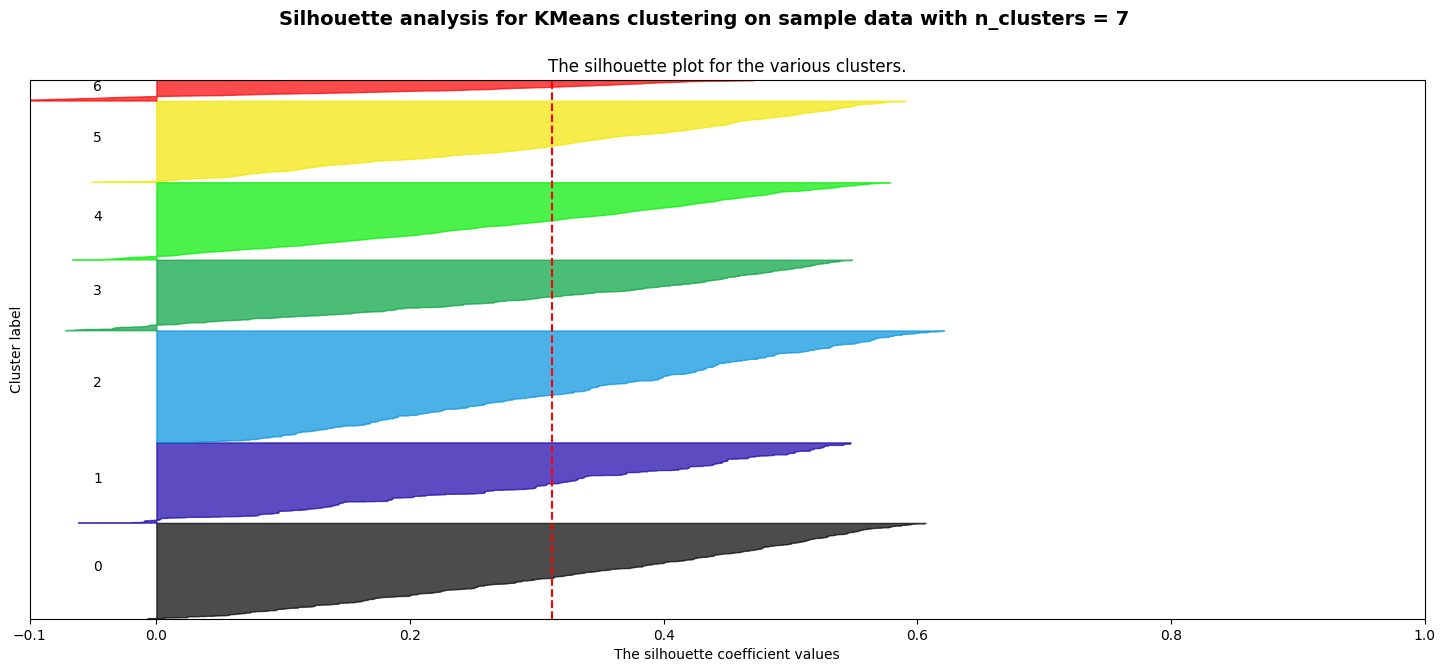

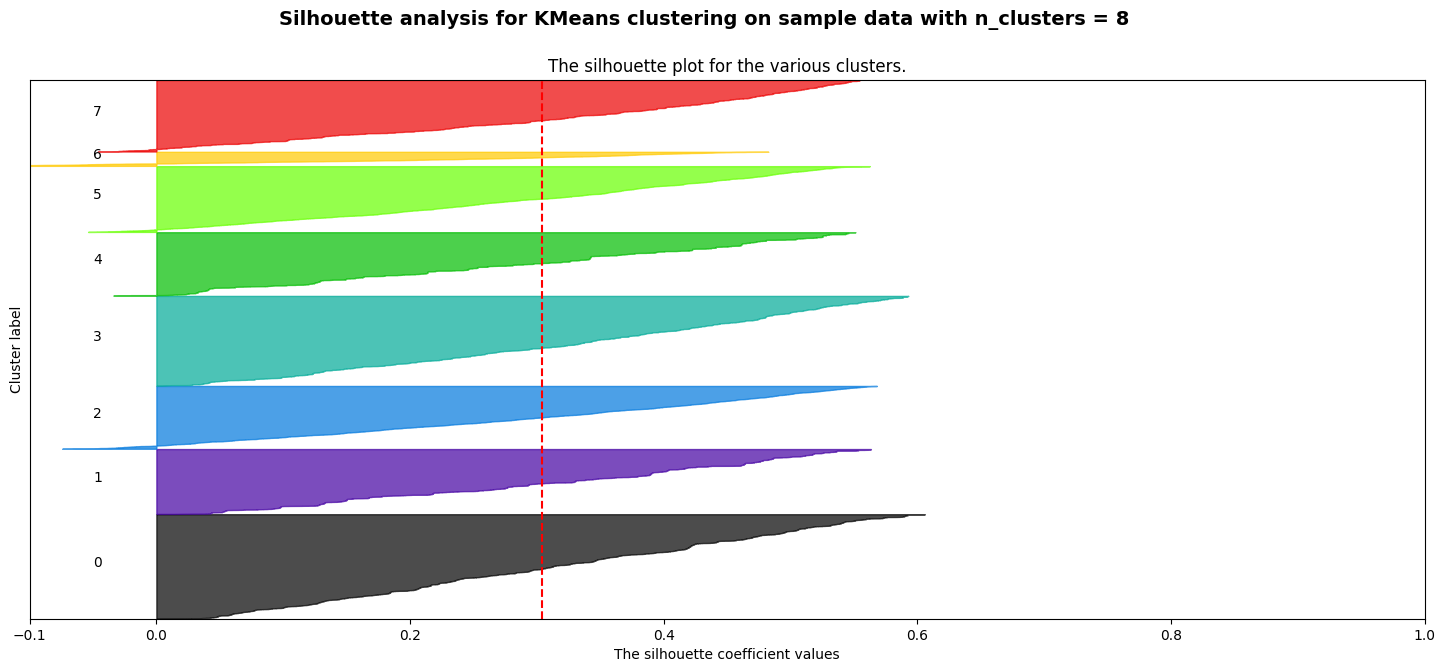

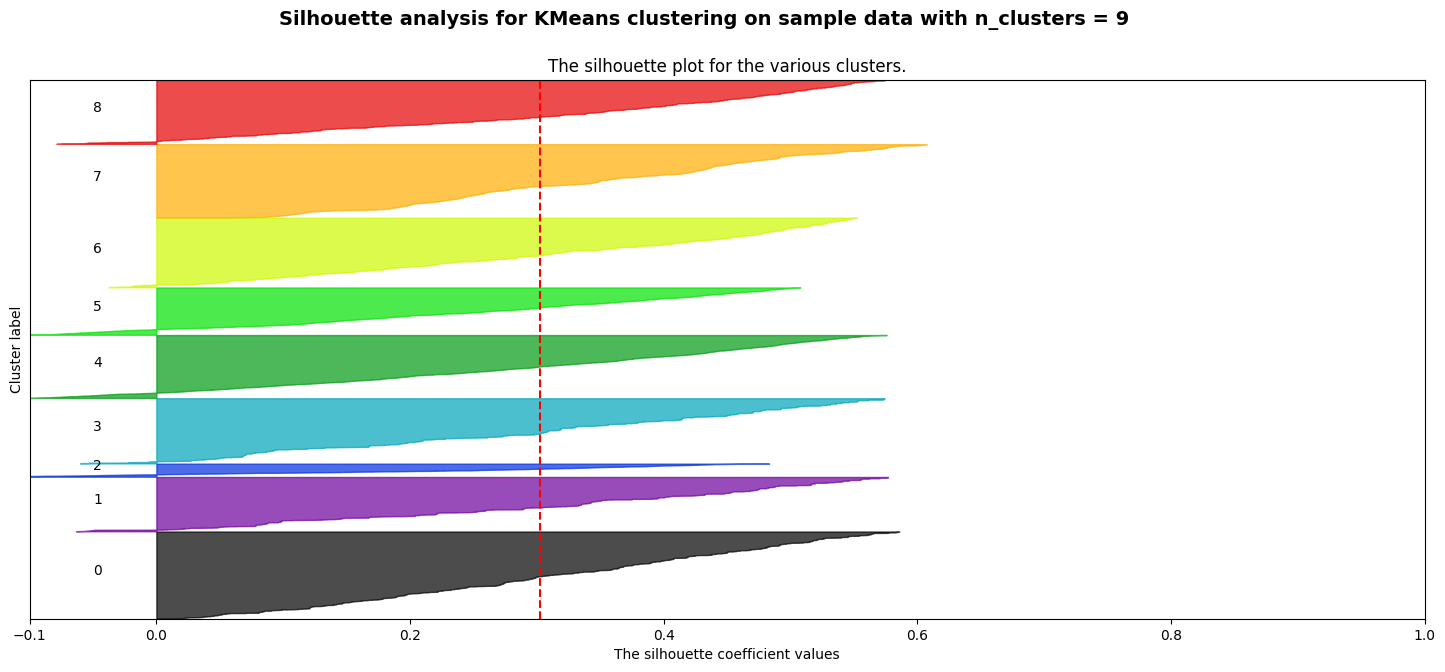

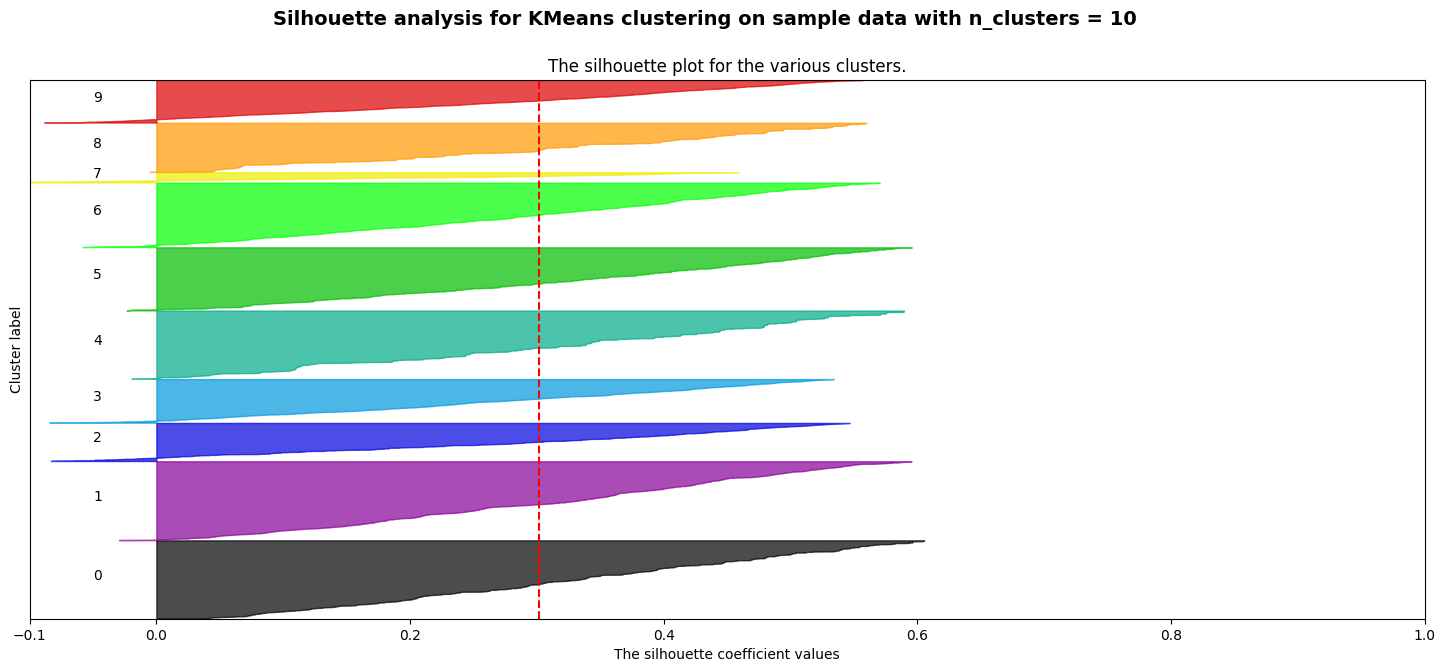

In [17]:
# Silhouette score

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Because the average score is 0.3207114234, you choose 2,3,4. We can see k = 4, has clusters of uniform size.


In [18]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [19]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [20]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [22]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

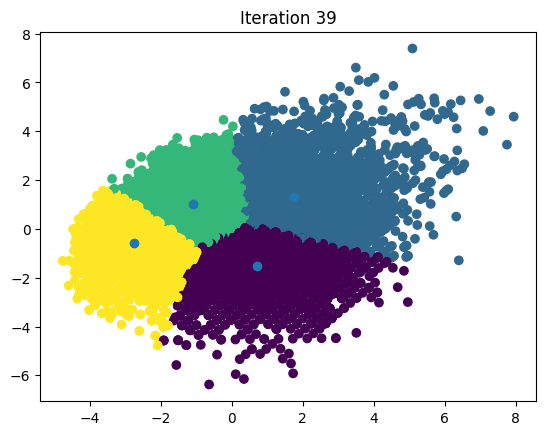

In [23]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [24]:
centroids

,0,1,2,3
overall,4.642364,6.405155,4.311694,2.583541
potential,4.369041,6.512406,5.838660,4.283190
wage_eur,1.088135,1.614006,1.074427,1.017366
value_eur,1.035494,1.369797,1.062916,1.013460
age,5.435779,4.445231,2.700703,2.483590


## 4. Predict

### Cluster 0 is old player(lão tướng)
- have a Intermediate overall or potentail, overall and potential is a same
- age from 30 -> 40
- value_eur and wage_eur is Intermediate

In [37]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
1464,L. Jiménez,75,75,4000.0,1800000.0,37
1466,L. López,75,75,15000.0,1900000.0,38
1467,A. Pyatov,75,75,500.0,625000.0,37
1474,J. Corona,75,75,23000.0,625000.0,40
1480,R. Pasveer,75,75,8000.0,625000.0,37
...,...,...,...,...,...,...
18867,S. Ghosh,51,51,500.0,40000.0,29
18888,Liu Xinyu,51,51,2000.0,60000.0,29
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


### Cluster 1 is start player(đang ở đỉnh cao sự nghiệp)
- have a high overall or potential, overall and potential is a same, a most highest overall and potential in each
- age from 26 -> 31
- have a most value_eur in each

In [38]:
players[labels == 1][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
6832,S. Román,68,73,650.0,1400000.0,26
7085,G. Guruceaga,68,73,500.0,1400000.0,26
7319,Sori Mané,68,75,5000.0,2200000.0,25
7329,N. Šipčić,68,73,4000.0,1600000.0,26


### Cluster 2 is young player(có tiềm năng và có tương lai thành các ngôi sao, các sao trẻ đang lên)
- have a immediate overall, but have a potentail higher than overall much
- age from 17 -> 21
- have a high value_eur after cluster 1, have a low wage_eur(được các clb săn đón)

In [41]:
players[labels == 2][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
2415,A. Aouchiche,74,82,9000.0,9000000.0,18
2866,Osvaldão Murilo,73,73,9000.0,3100000.0,21
2871,Nicolás Formido,73,73,16000.0,3600000.0,21
2877,Neviano Neves,73,73,17000.0,3600000.0,21
2884,Luis Couprins,73,73,9000.0,3200000.0,21
...,...,...,...,...,...,...
18124,M. Løvik,55,76,500.0,375000.0,17
18125,J. Hernández,55,77,500.0,400000.0,17
18227,K. Urbański,54,79,550.0,350000.0,16
18311,S. Denham,54,77,500.0,325000.0,18


### Cluster 3 is young player
- have a lowest overall and potential
- age from 19 -> 23
- have a lowest value_eur and wage_eur

In [42]:
players[labels == 3][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
11593,Raphael Doninho,64,64,5000.0,700000.0,21
12250,D. Ferdiz,63,63,500.0,500000.0,21
12643,B. Miranda,63,65,500.0,625000.0,23
12871,M. Collao,63,65,900.0,625000.0,23
13552,S. Matthews,62,66,2000.0,575000.0,24
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19
